In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize_scalar

from tqdm import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2

from matplotlib import cm
import colormaps
col = [ colormaps.viridis(x) for x in np.linspace(0, 1, 20) ]

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize']=14
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.frameon'] = False
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['lines.linewidth'] = 1.
#from matplotlib import rc
#rc('text', usetex=True)

from scipy.optimize import minimize_scalar

In [2]:
def EnergyRVS(a, size=10):
    return stats.norm.rvs(loc=a, scale=1., size=size)

def EnergyPDF(x, a):
    return stats.norm.pdf(x, loc=a, scale=1.)

In [3]:
def LLhFunction(a, data):
    return -np.sum(np.log(EnergyPDF(data, a)))

def DoTrial(n):
    data = EnergyRVS(2., size=int(n))
    res = minimize_scalar(LLhFunction, args=data)
    TestStat = -(LLhFunction(res.x, data) - LLhFunction(2., data))
    return res.x, TestStat

In [11]:
# ns = 1
# data = EnergyRVS(2., size=ns)
# x = np.linspace(-4., 8., 10000)
# y = np.array([(LLhFunction(g, data)-LLhFunction(2., data)) for g in x])

# f = plt.figure()
# ax = f.add_subplot(111)
# ax.plot(x, y, lw=2, label=r'$\mathcal{L}$ Scan')
# ax.axvline(x=x[np.argmin(y)], lw=2, color='red', label='True Minimum')
# ax.text(0.1, 0.1, r'$n_s$='+str(ns), transform=ax.transAxes, fontsize=14)
# ax.set_xlabel(r'$\gamma$')
# ax.set_ylabel(r'$-\log(\mathcal{L})$')
# ax.legend(loc='best')
# f.savefig('plots/LLhSpace_'+str(ns)+'.pdf')
# f.show()

In [12]:
TestNS = np.array([1., 2., 3., 4., 5., 7., 10., 20., 50., 100.0, 200., 500., 1000.])
NTrials = 10000

Results = dict()

for i in TestNS:
    Results[i] = dict()
    Results[i]['gamma'] = np.zeros(NTrials)
    Results[i]['lambda'] = np.zeros(NTrials)
    for j in range(NTrials):
        Results[i]['gamma'][j], Results[i]['lambda'][j] = DoTrial(i)
        
Evaluation = dict()
Evaluation['AverageGamma'] = np.array([np.average(Results[i]['gamma']) for i in TestNS])
Evaluation['GammaSigma'] = np.array([np.std(Results[i]['gamma']) for i in TestNS])
Evaluation['AverageLambda'] = np.array([np.median((Results[i]['lambda'])) for i in TestNS])
Evaluation['LambdaSigma'] = np.array([np.std((Results[i]['lambda'])) for i in TestNS])

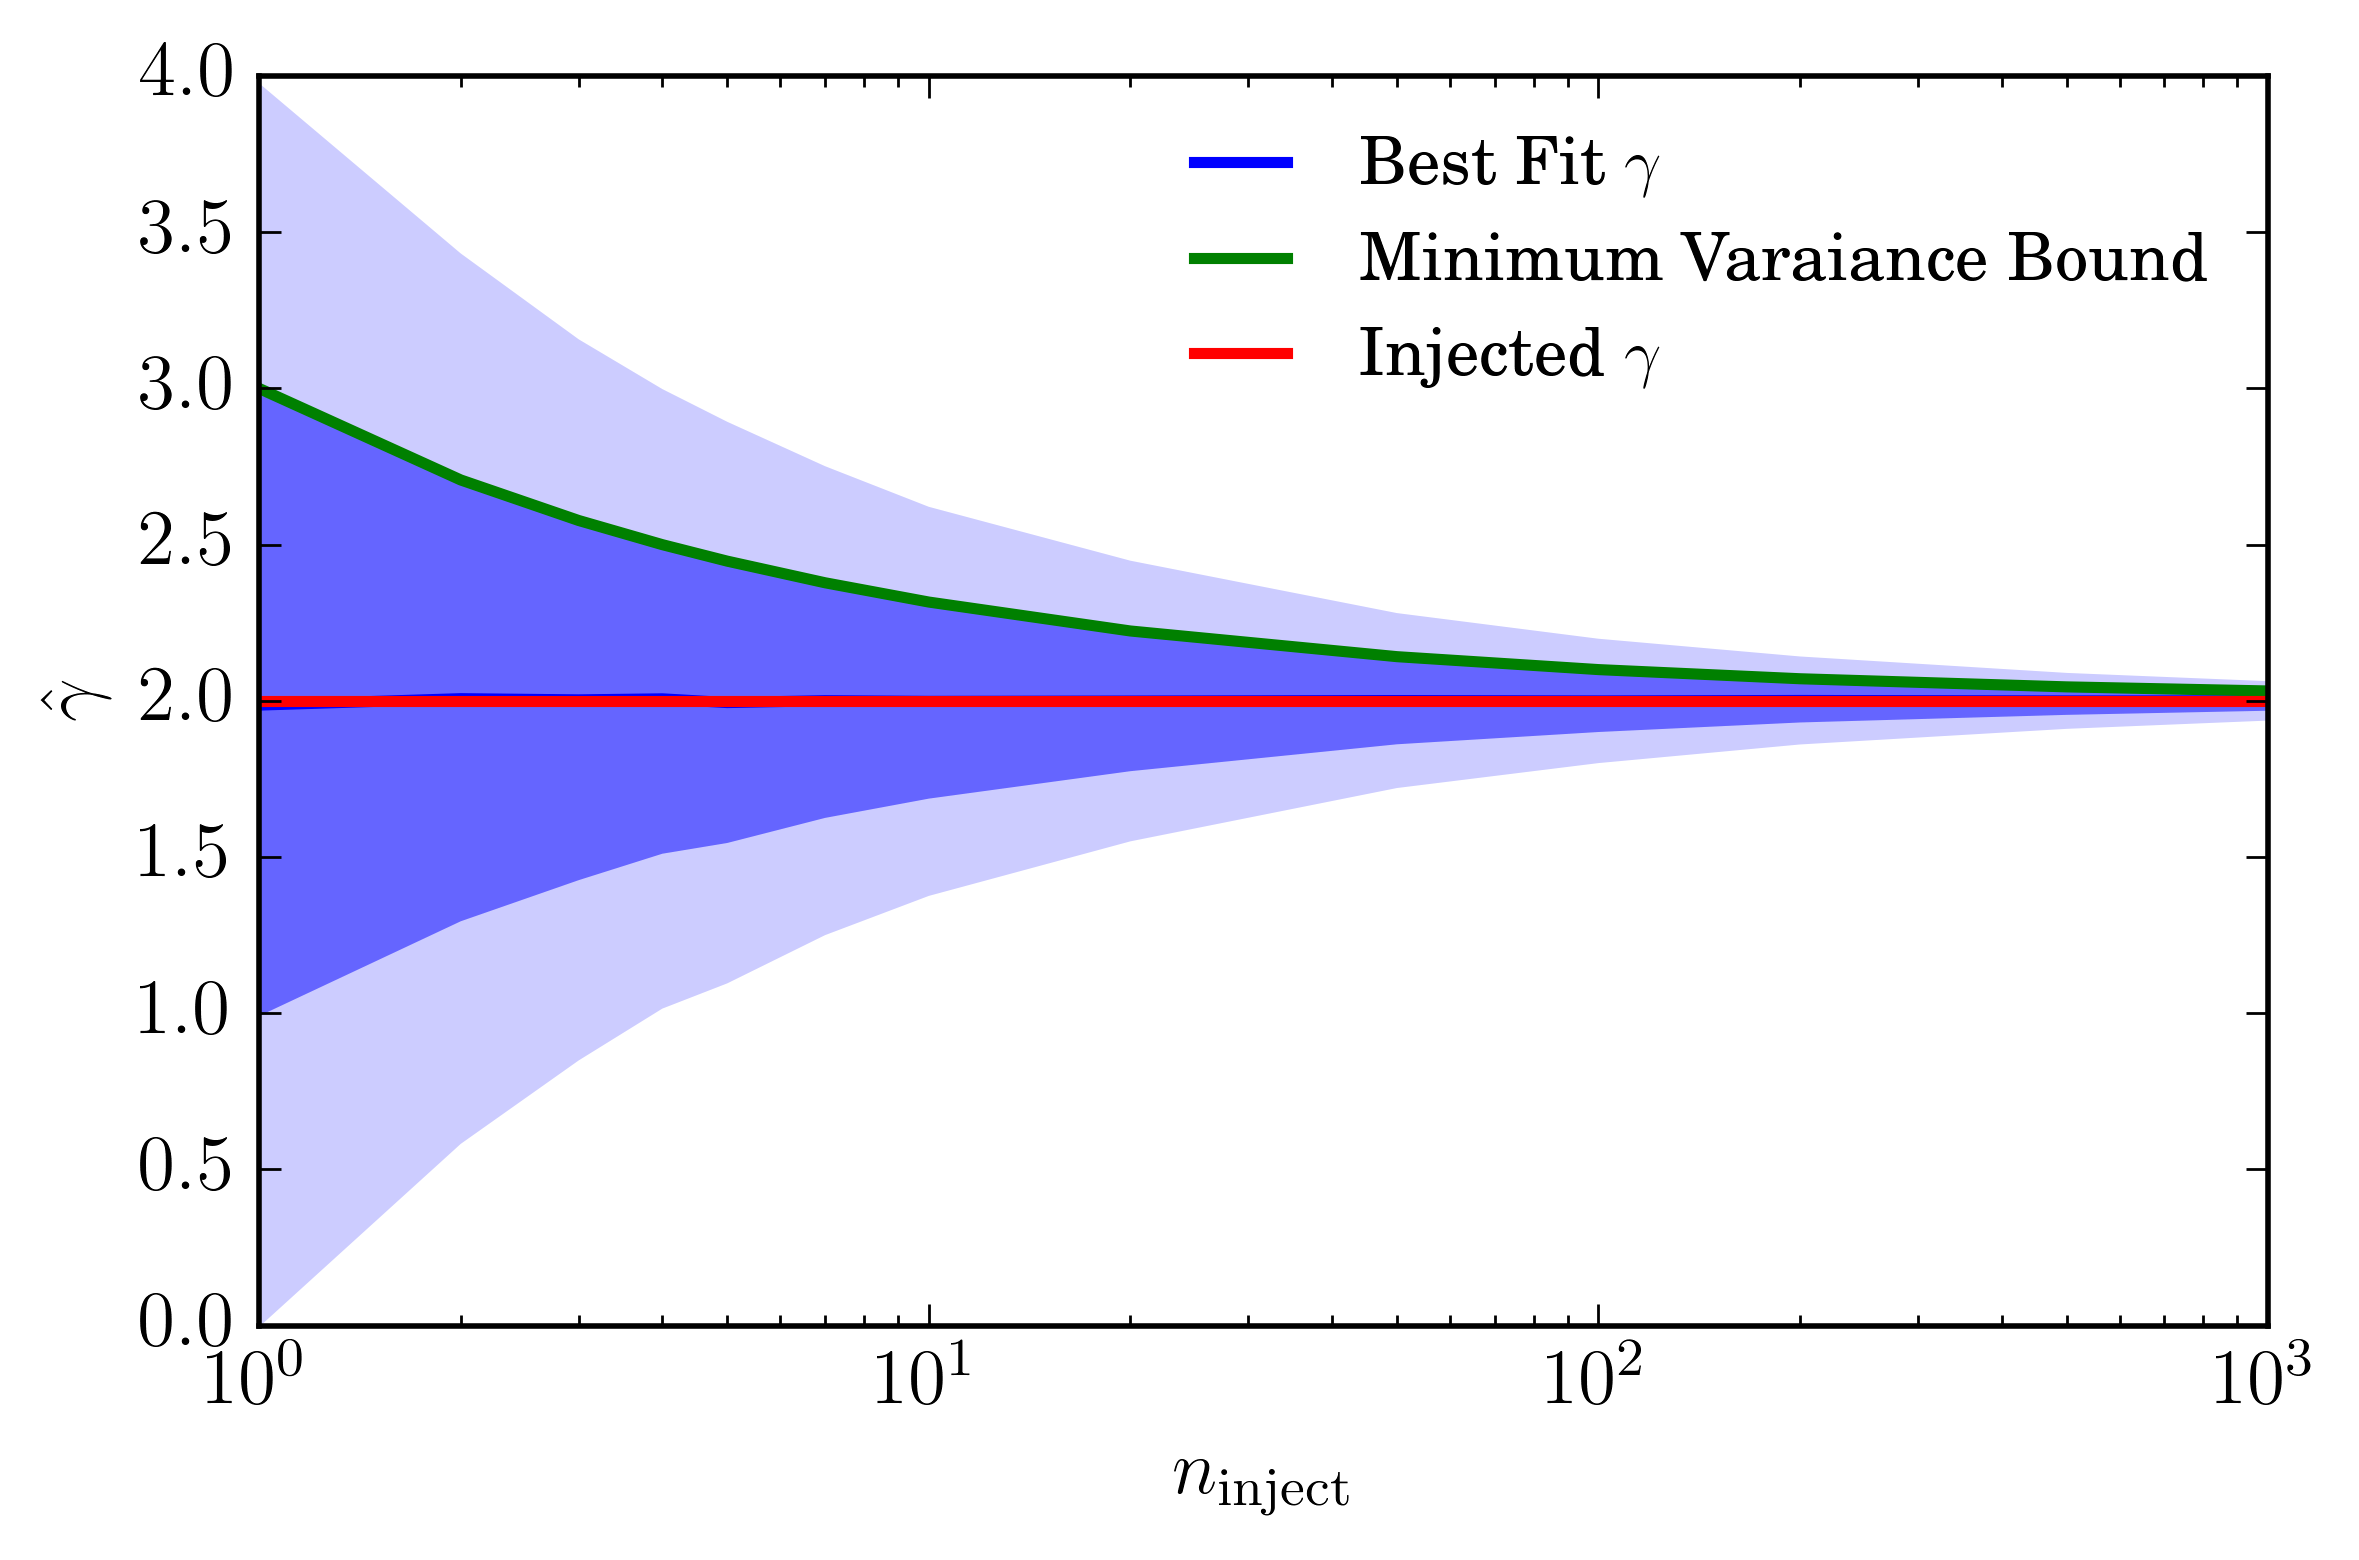

In [13]:
plt.figure()
plt.plot(TestNS, Evaluation['AverageGamma'], lw=2, label=r'Best Fit $\gamma$')
plt.fill_between(TestNS,
                 Evaluation['AverageGamma']-Evaluation['GammaSigma'],
                 Evaluation['AverageGamma']+Evaluation['GammaSigma'],
                 facecolor='blue', alpha=0.5, lw=0, label=r'$1\sigma$')
plt.fill_between(TestNS,
                 Evaluation['AverageGamma']-2.*Evaluation['GammaSigma'],
                 Evaluation['AverageGamma']+2.*Evaluation['GammaSigma'],
                 facecolor='blue', alpha=0.2, lw=0)
plt.plot(TestNS, 1./np.sqrt(TestNS)+2., lw=2, label='Minimum Varaiance Bound')

plt.xlim(1.e0, max(TestNS))
plt.ylim(0., max(max(Evaluation['AverageGamma']), 4.))
plt.semilogx()
# plt.semilogy()
plt.axhline(y=2., lw=2, color='red', label=r'Injected $\gamma$')
plt.xlabel(r'$n_\mathrm{inject}$')
plt.ylabel(r'$\hat{\gamma}$')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('plots/BestFitGammaDist.pdf')
plt.show()

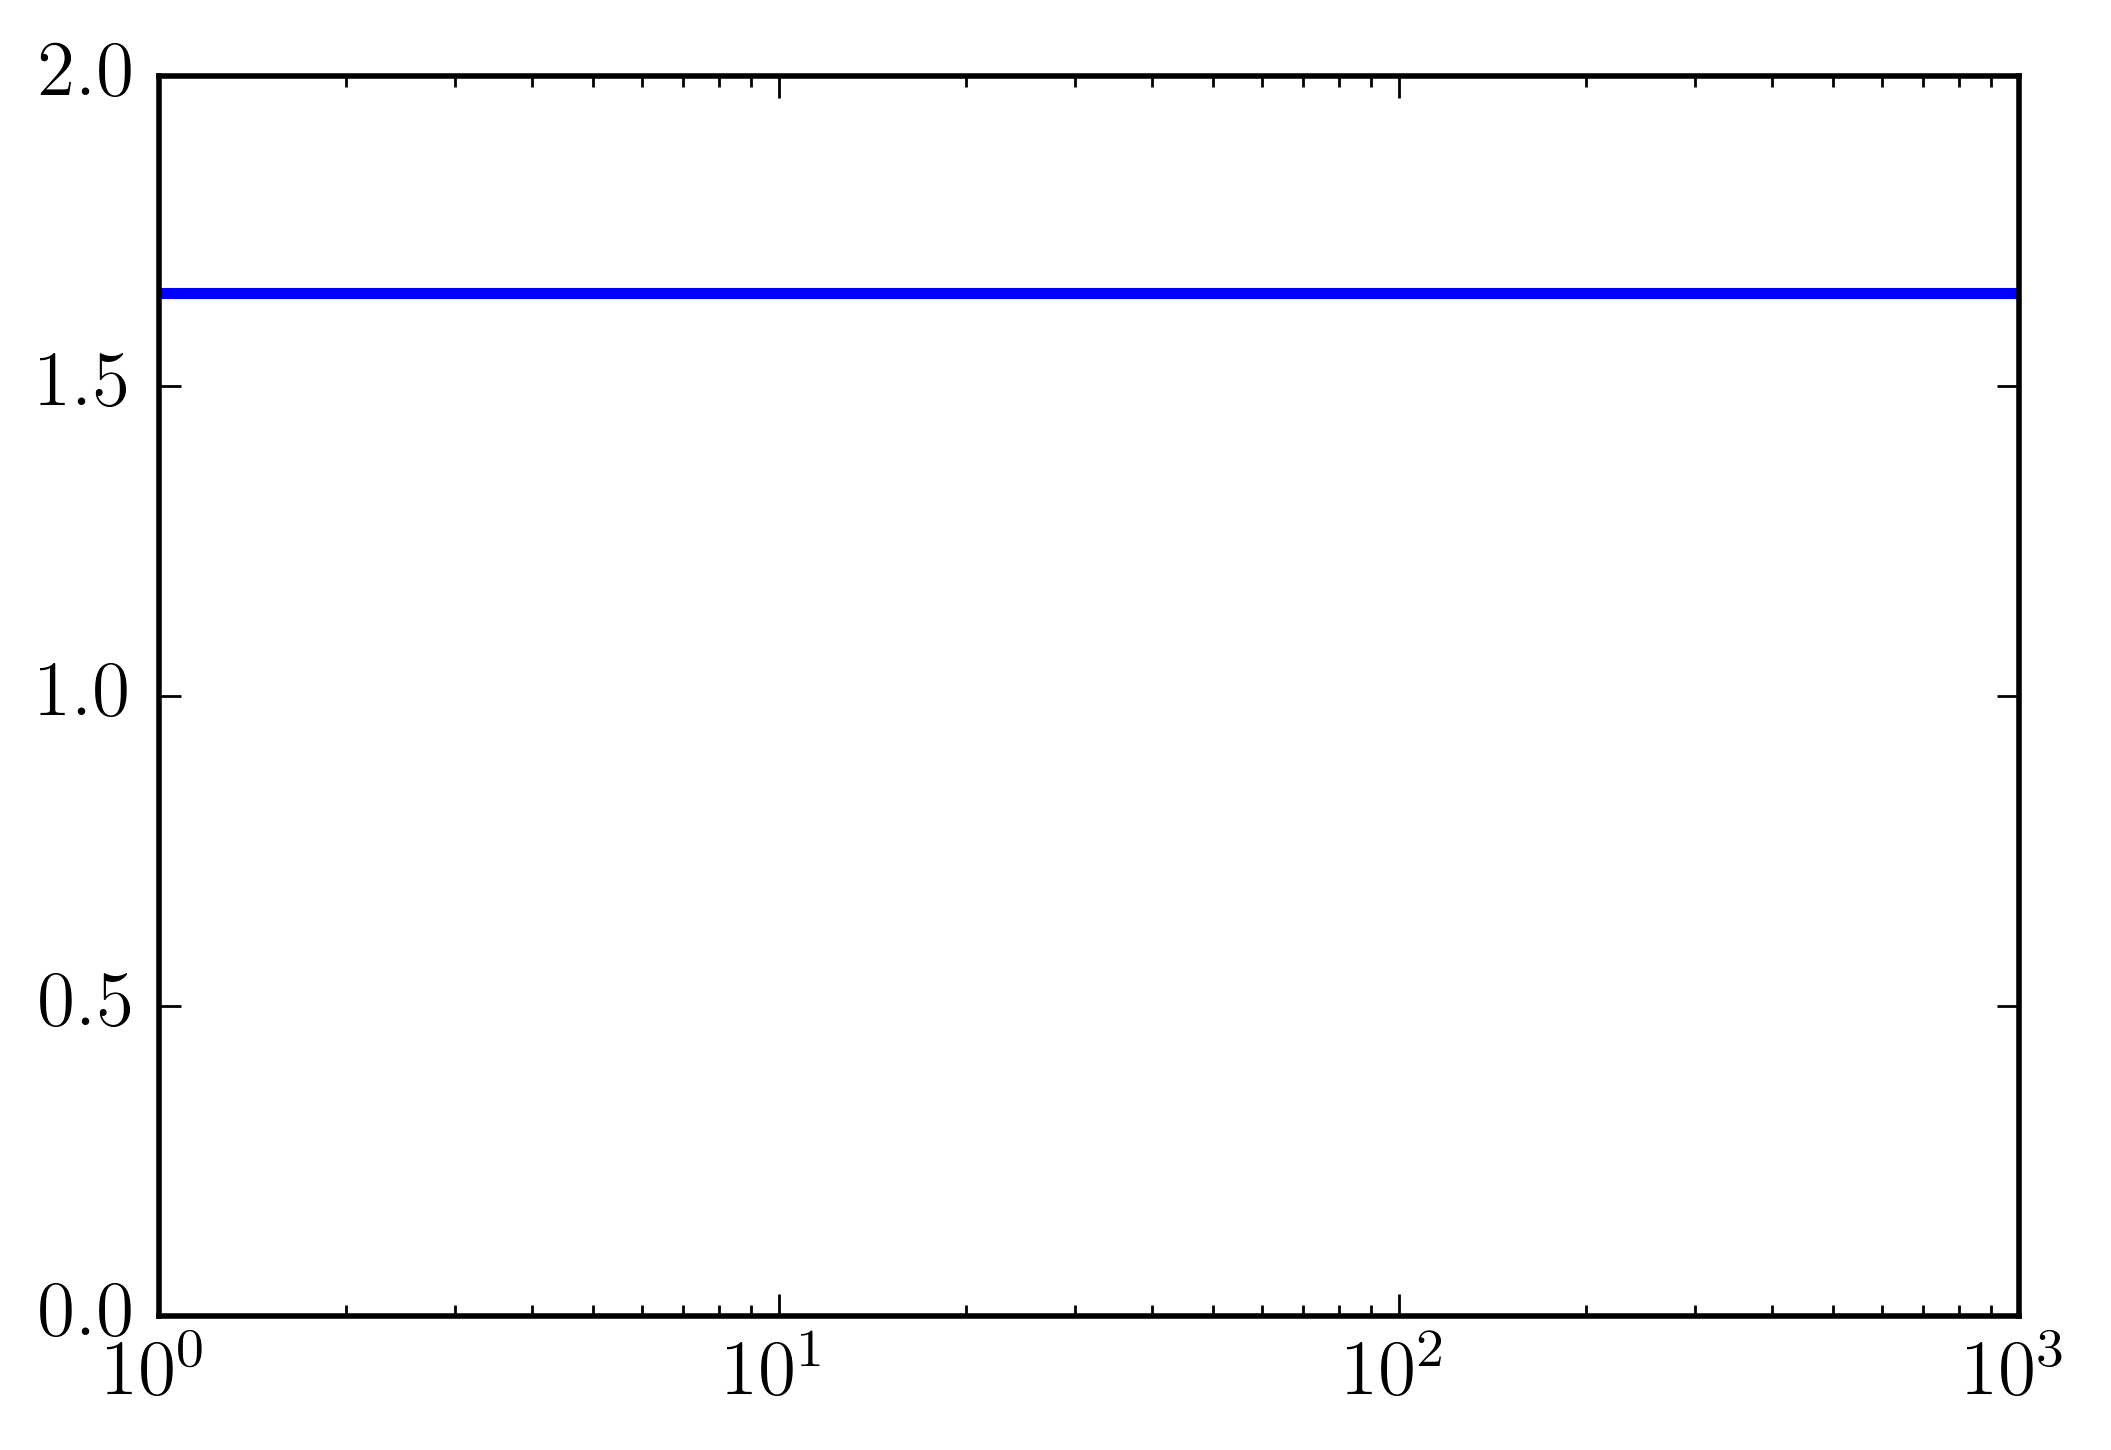

In [14]:
y = np.array([])
for n in TestNS:
    x = np.ones(n) * (2.+1./np.sqrt(n))
    res = np.sum(np.log(stats.norm.pdf(x, loc=x, scale=1.))) - np.sum(np.log(stats.norm.pdf(x, loc=2., scale=1.)))
    y = np.append(y, res)
    
plt.figure()
plt.plot(TestNS, np.exp(y), lw=2)
plt.ylim(0., 2.)
plt.semilogx()
plt.show()

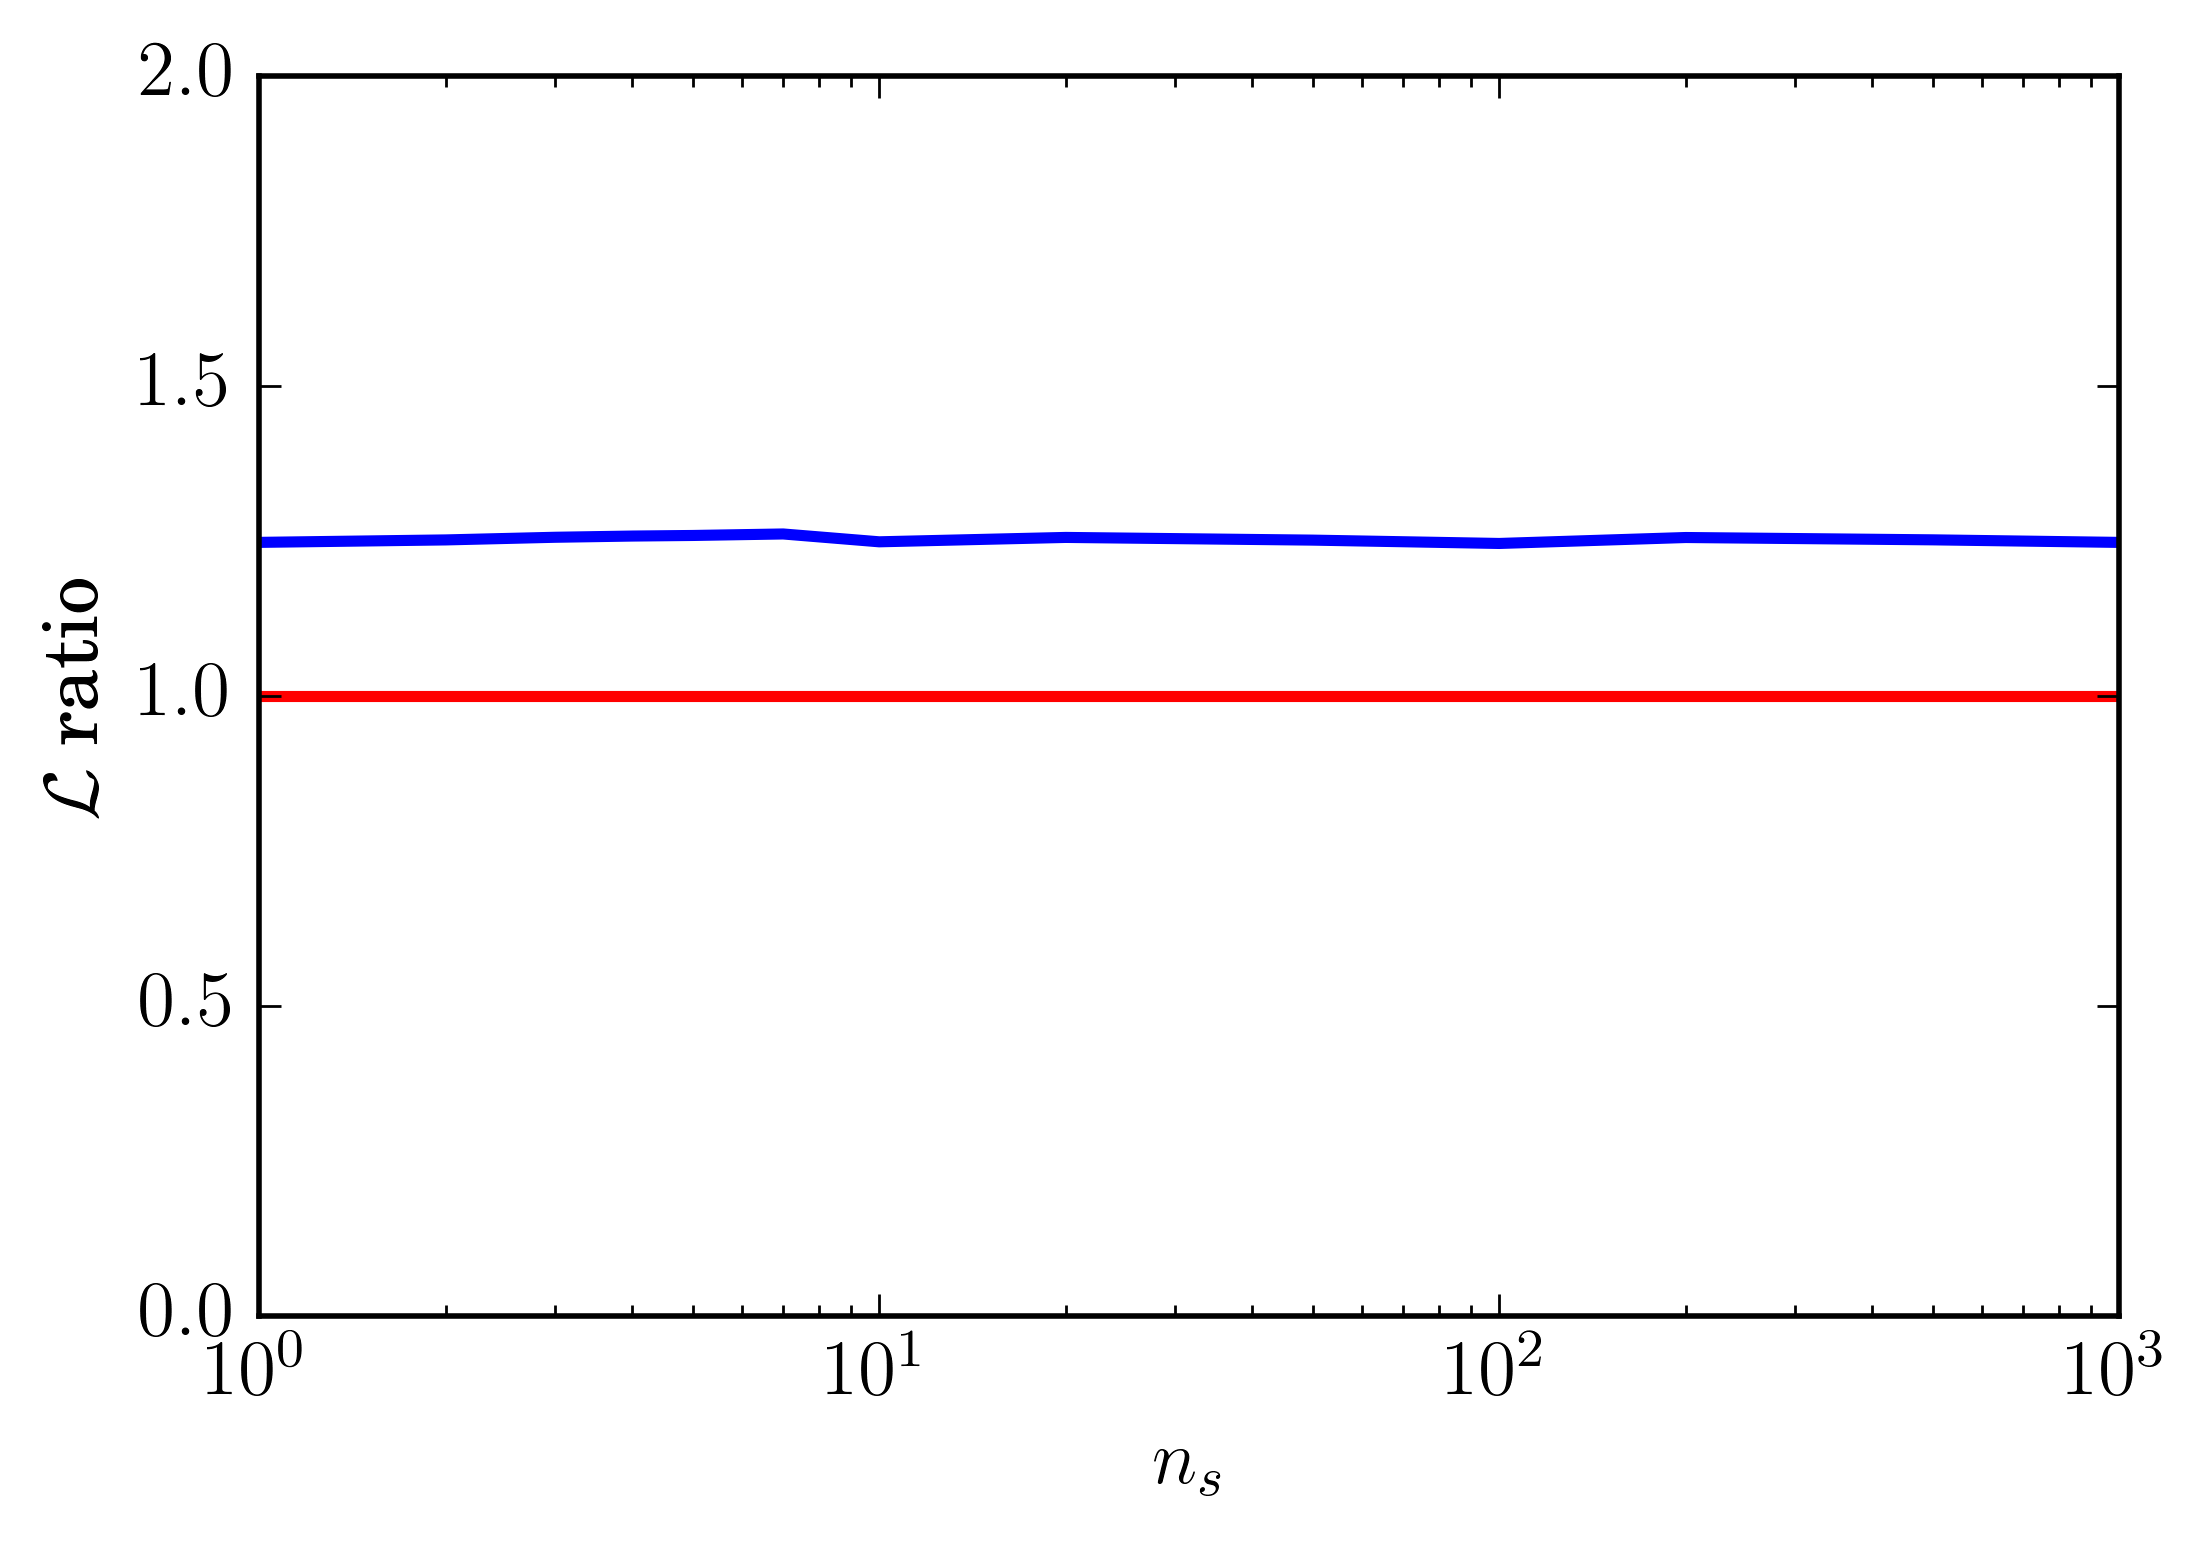

In [15]:
plt.figure()
plt.plot(TestNS, np.exp(Evaluation['AverageLambda']), lw=2)
plt.xlim(1.e0, max(TestNS))
plt.ylim(0., 2.)
plt.semilogx()
# plt.semilogy()
plt.axhline(y=1., lw=2, color='red')
plt.xlabel(r'$n_\text{s}$')
plt.ylabel(r'$\mathcal{L}$ ratio')
plt.savefig('plots/test2.pdf')
plt.show()

In [9]:
# data = Results[1.]['lambda']
# fit = stats.chi2.fit(data)
# x = np.linspace(0., 5, 1.e3)
# y = stats.chi2.pdf(x, fit[0])
# plt.figure()
# plt.hist(data, bins=np.linspace(0., 5, 100+1), histtype='step', normed=True,)
# plt.plot(x, y, lw=2, color='red')
# plt.semilogy()
# plt.savefig('plots/Chi2FitNSEqual0.pdf')
# plt.show()